## The inverse problem

Assume you are given some data $\delta\in \mathcal Y\subseteq \mathbb R^d$ and experts provide the relation 

\begin{equation}
  \delta = (\mathcal O \circ G) (\theta) + \eta, \quad \eta \sim \mathcal{N}(0, aI).
\end{equation}

The so-called __Forward-map__ $G\colon X\to\mathcal X$ represents the underlying physical model, such as the famous ground-water flow or something more involved, like a scattering problem in medicine, industrial or environmental application.
The __Observation-operator__ $\mathcal O\colon \mathcal X\to \mathcal Y$ is, as its name suggests, the modelling of a finite dimensional observation. In practice this covers __point-evaluations__ or __energy-averaging__ and many more.

Your task is now:

\begin{equation}
\tag{1}
\text{find the parameter } \theta \text{ that generates the data } \delta.
\end{equation}

Obviously, this problem does not need to be well-posed. For example consider the case of $\mathcal O\circ G$ beeing non invertible, which is usually the case. 
On the other hand, even without the *noise* $\eta$, the data $\delta$ need not to be in the image of $\mathcal O\circ G$. 
***

### The deterministic approach

One naive way of solving (1) is to neglect the noise and replace it with the *least-square* problem 

\begin{equation}
  \theta^\ast = \mathrm{argmin}_{\theta\in X} \| \delta - (\mathcal O\circ G)(\theta) \|_{\mathcal Y}^2,
\end{equation}

where $\| \cdot \|_{\mathcal Y}$ denotes for example the euclidean norm in $\mathbb R^d$.

In practice, even this problem is hard to solve and it is usually replaced by the __regularized__ minimisation problem 

\begin{equation}
  \tag{2}
  \theta^\ast = \mathrm{argmin}_{\theta\in X} \| \delta - (\mathcal O\circ G)(\theta) \|_{\mathcal Y}^2 + \mathcal R(\lambda, \theta).
\end{equation}

The regularizer $\mathcal{R}$ renders the problem solvable where the parameter $\lambda\in\mathbb{R}_+$ models the impact of the regularisation. Usually, one uses an $L^2$-norm regularizer, which damps the values of $\theta$ or  an instance of the $L^1$ norm which may imply sparsity in the representation.

***

### The Bayesian approach

In recent years, a statistical formulation of problem (1) became popular, since the numerical managability is __(almost)__ feasible today.

If we consider a probability space $(\Omega, \Sigma, \mathbb{P})$ and take the *unknown* parameter as a random variable $\theta\colon \Omega\to X$, the formulation in (1) is now __randomized__.

The statistical (or Bayesian) problem reads now:

\begin{equation}
  \tag{3}
  \text{find the probability distribution } \pi_\delta \text{ on } X \text{ of } \theta \text{ given } \delta.
\end{equation}

This setting can be formulated with under rather mild assumptions on the quantites, even in the case of $X, \mathcal X$ and $\mathcal Y$ beeing general Banach spaces. 
In the special case considered here of $(\mathcal Y, \| \cdot \|) = (\mathbb R^d, \|\cdot \|_2)$, we can show that the problem (3), admits a unique solution under a Lipschitz and growth assumption on $\mathcal O\circ G$.
For more details on the assumptions that imply existence and uniqueness consider the *Acta Numerica article of A. M. Stuart*.

The reason why we call this kind of ansatz the *Bayesian* approach is due to the fact that we consider a generalisation of Bayes theorem on the level of absolute continuous measures (or densities).

***

Assume that you have __prior__ knowledge about the unknown parameter $\theta$ in the sense of an initial distribution $\pi_0$ on $X$.
Then, by Bayes theorem we know that 

\begin{equation}
  \mathbb{P}(\theta \;\vert\; \delta) = \frac{\mathbb{P}(\delta\;\vert\; \theta)}{\mathbb{P}(\delta)} \mathbb{P}(\theta)
\end{equation}

or on the level of Radon-Nikodym derivatives

\begin{equation}
  \tag{*}
  \pi_\delta = \frac{\mathcal L(\delta \;\vert\; \theta)}{Z} \pi_0,
\end{equation}

where $Z$ is a normalisation constant, such that $\pi_\delta$ forms a density and $\mathcal L$ is the data __likelihood__ function.

Due to the choice of the *additive centered Gaussian noise* $\eta$, the likelihood function takes the form

\begin{equation}
  \mathcal L(\delta\;\vert\; \theta) = \exp\left(-\frac{1}{2}\underbrace{\langle \delta - (\mathcal O\circ G)(\theta), \Gamma^{-1}\left(\delta - (\mathcal{O}\circ G)(\theta)\right)\rangle}_{=:\Phi(\theta)}\right).
\end{equation}

***
#### Connection to deterministic optimization

In our special case of linear spaces, finite dimensional observations, Gaussian noise and a standard normal prior $\pi_0 = \mathcal N(0, aI)$ the bayesian __posterior__ density (*) reads
\begin{equation}
  \pi_\delta = Z^{-1} \exp\left(-\frac{1}{2}\Phi(\theta)\right) \exp\left(-\frac{1}{2}\|\theta\|_2^2\right).
\end{equation}

Maximizing the expression on the right, corresponds to the deterministic minimisation optimization problem with a Tikhonov regularizer:

\begin{equation}
  \theta^\ast = \mathrm{argmin}_{\theta\in X} \|\delta - (\mathcal O \circ G)(\theta)\|_2^2 + \lambda \|\theta\|_2^2, \qquad \text{ for } \lambda=1.
\end{equation}

As expected, other priors lead to different formulations of the energy functional. And some can not even be interpreted in that fashion.

## Attention - The inverse crime
We are going to commit an inverse crime, that is mesurement up to pertubation $\eta$ which is taken from a given model is fitted to the same (forward) model $G$ (up to physical discretisation level). This is just intended for motivational proposes of data generation. Recall that in praxis the measurments are real world based but the models may be of a simplified fashion only (in both physical model and random input design).

### Inverse Problem and deterministic optimisation with application to random partial differential equations
Let $D=[0,1]^2$ and let $\eta\in \mathbb{R}^d$ here to be some deterministic pertubation of the observation, so that 
our measurement $\delta$ takes the form $\delta = \mathcal{O}(G(\theta)) + \eta$.
In our application let now
***
\begin{align}
G\colon \Gamma^M:=[-1,1]^M&\mapsto \mathcal{X}=H_0^1(D)
\theta\mapsto G(\theta) = u(\theta)
\end{align}
***
be the solution operator such that given $\theta\in X=\Gamma^M$ it maps to the weak solution $u$ of
***
\begin{align}
\begin{array}{rcll}
-\operatorname{div}\kappa(x;\theta)\nabla u(x;\theta) &=& f(x) & \text{in }D,\\
                                          u(x;\theta) &=& 0    & \text{on }\partial D,
\end{array}                                         
\end{align}
***
or alternative a homogeneous Dirichlet-Neumann problem 
***
\begin{align}
\begin{array}{rcll}
-\operatorname{div}\kappa(x;\theta)\nabla u(x;\theta) &=& f(x) & \text{in }D,\\
                                          u(x;\theta) &=& 0    & \text{on }\Gamma_0:={0}\times [0,1],\\
    \kappa(x;\theta)\nabla u(x;\theta)\cdot\mathbf{n} &=& 0    & \text{on }\Gamma_1:=\partial D\setminus \Gamma_0,
\end{array}                                         
\end{align}
***


where the parametric diffusion coefficient $\kappa$ is given in an affine fashion as
\begin{align}
\kappa(x,\theta) = \kappa_0(x) + \sum\limits_{m=1}^{M}\kappa_m(x)\theta_m
\end{align}

Let the observation operator $\mathcal{O}$ be of point evaluation structure. For this we assume regularity of solution, that is $u(\cdot,\theta)\in\mathcal{C}(\overline{D})$ for all $\theta\in\Gamma^M$.
Let $x_1,\cdots,x_d\in D$ then we define 
\begin{align}
\mathcal{O}(u(\cdot,\theta)) := [u(x_i,\theta)]_{i=1}^d \in \mathbb{R}^d.
\end{align}

## Exercise:
Choose some $\theta^*\in\Gamma^M$ and build a fine discretisation $V_f\subset V:=H_0^1(D)$ and compute *real world  simulation* $u_f^*\in V_f$ and compute $\mathcal{O}(u_f^*)$. Now we assume that we the observed data is vague (e.g. *measurement error*). We model this by taking a realisation $\eta \sim \mathcal{N}(0, aI)$ for some small $a>0$ and obtain the *real world* measurement $\delta = \mathcal{O}(u_f^*) + \eta$.

Your task is now to solve the constrained optimization problem

\begin{align}
 \operatorname{argmin}\limits_{\theta\in\Gamma^M}\| \delta - (\mathcal{O}\circ G)(\theta)\| + \lambda\|\theta\|_2^2 + \mu\|\theta\|_1^2.
\end{align}

with regularisation parameters $\lambda,\mu\geq 0$ using *scipy.optimise* package.

Play around with
  - the *number of observation points*,
  - *regularisation parameters $\lambda,\mu$*,
  - the *amount of noise* simply modeled by some $a>0$ s.t. $\eta\sim\mathcal{N}(0,aI)$,
  - type of variational problem, either mixed Dirichlet-Neumann or pure Dirichlet.

The control parameters are setted here now.

In [1]:
# Choice of variational problem, either Dirichlet-Neumann(=True) or pure Dirichlet(=False)
mixedBC = True 

# regularisation parameters
lamVal  = 1e-6 # lambda
muVal   = 0.   # mu

# number of observersion points in each direction total of noP^2
noP = 3

# model a value eta through some a, no measurement error with a=0.
a =  0.00001

In [2]:
# necessary imports
from __future__ import division
import numpy as np
from dolfin import * # UnitSquareMesh, FunctionSpace, plot, Function, Expression, interpolate
from functools import partial
from coef_field import CoefField

% matplotlib inline

import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['figure.figsize'] = [12, 6]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


eta = a * np.random.randn(1)
print("noise = {v}".format(v=eta))
# define fenics related data for the variational formulation of the (forward) problem
M = 2 
kappa = CoefField(1, M, scale = 0.9, decay = 0)

def setupFEM(N, deg):
    mesh = UnitSquareMesh(N,N)
    V = FunctionSpace(mesh,"Lagrange", deg)
    u = TrialFunction(V)
    v = TestFunction(V)
    # Define boundary condition
    u0 = Constant(0.0)
    
    bc = None
    if mixedBC == False:
        bc = DirichletBC(V, u0, 'on_boundary')
    else: #mixed DN problem
        def dirichlet(x):
            return near(x[0],0.0)
        bc = DirichletBC(V, u0, dirichlet)#'on_boundary')
    # define L form
    f = Constant(1)   
    L = f*v*dx

    return V, u, v, L, bc

assert(M==2)
# define parametric bilinear form
bf = lambda field, u, v :inner(field*grad(u), grad(v))*dx

noise = [ -4.86036650e-06]


Define the (forward) operator $G$ and the (point evaluation) observation $\mathcal{O}$.

In [3]:
# define the operator G: X -> H_0^
def G(theta, FEM, verbose=False):
    
    V, u , v, L, bc = FEM
    
    kappa_theta = kappa.realisation(theta,V)
    
    if verbose:
        plt.figure()
        plt.subplot(121)
        im = plot(kappa_theta, title = "original input field")
        plt.colorbar(im)
    
    u_theta = Function(V)
    
    solve(bf(kappa_theta,u,v) == L, u_theta, bc)
    return u_theta

# define point evaluation observation
def O(u, points, verbose = False):
    # points = \{x1,...,xd\}\subset[0,1]^2
    if verbose:
        plt.subplot(122)
        X,Y = [p[0] for p in points], [p[1] for p in points]
        im = plot(u, title = "solution for original input field and observation points")
        plt.colorbar(im)
        plt.scatter(X,Y, marker='x', c = 'r')
    
    return np.array([u(p) for p in points])


We now create $\delta$ representing some *real world* measurement observation.

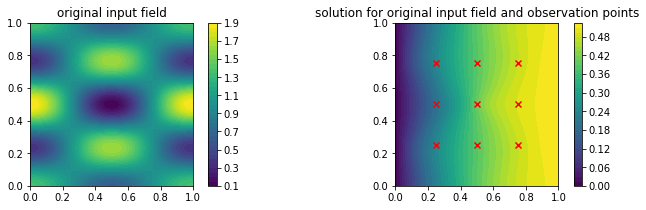

In [4]:
# fine FEM space
FEM = setupFEM(100, 2)
theta_star = np.array([-0.3,0.7]) # in [-1,1]^M with M = 2

# create observation points for O
points = []
ss  = 1.0/float(noP+1) # step size for equidistant observation points in the interior
for k1 in range(noP):
    for k2 in range(noP):
        points.append([(k1+1)*ss, (k2+1)*ss])

mpl.rcParams['figure.figsize'] = [12, 3]
delta = O(G(theta_star, FEM, verbose=True), points, verbose=True) + eta 

Create the functional 
***
\begin{align}
\mathcal{J}_{\lambda,\mu}(\theta):= \| \delta - (\mathcal{O}\circ G)(\theta)\| + \lambda\|\theta\|_2^2 + \mu\|\theta\|_1^2.
\end{align}
***
based on a coarse *real world approximating* FEM scheme.

In [5]:
# coarser FEM space for the fit
FEM = setupFEM(40, 1)
## ||.||_p^2
p_norm = lambda vec,p : np.linalg.norm(vec, ord = p)**2

def J(theta, lam=0., mu=0.):
    return p_norm(delta - O(G(theta, FEM), points),2) + lam * p_norm(theta,2) + mu * p_norm(theta,1)

Since we chose $M=2$ we are able to plot the functional $J$.

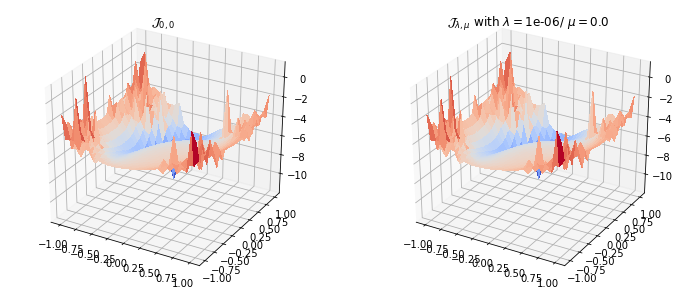

In [6]:
mpl.rcParams['figure.figsize'] = [12, 5]
# plotter routine of the functional J
def plotJ(domain, gridsize):
    # domain = [ [x0,y0], [x1,y1] ]

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make grid data.
    X = np.linspace(domain[0][0], domain[1][0], gridsize[0])
    Y = np.linspace(domain[0][1], domain[1][1], gridsize[1])
    X, Y = np.meshgrid(X, Y)

    # compute J_{0,0}(\theta) which involves a FE simulation
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = J(np.array([X[i,j],Y[i,j]]))


    Z2 = Z.copy()        
    Z = np.log(Z)
    # and add  lam * ||\theta||_2^2 + mu ||theta||_1^2
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z2[i,j] += lamVal * p_norm(np.array([X[i,j],Y[i,j]]),2) + muVal *  p_norm(np.array([X[i,j],Y[i,j]]),1)
    Z2 = np.log(Z2)

    # Plot the surface.
    plt.subplot(1,2,1, projection='3d')
    plt.title(r'$\mathcal{J}_{0,0}$')
    ax = plt.gca()
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    plt.subplot(1,2,2, projection='3d')
    plt.title(r'$\mathcal{J}_{\lambda,\mu}$' + " with " r'$\lambda=$'+str(lamVal)+"/ " r'$\mu=$'+str(muVal))
    ax = plt.gca()
    surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

#plot J on full domain \Gamma^2 = [-1,1]^2
plotJ( domain = [(-1,-1),(1,1)], gridsize = (30,30))

We take a closer look of $\mathcal{J}$ near the original value $\theta^*$.

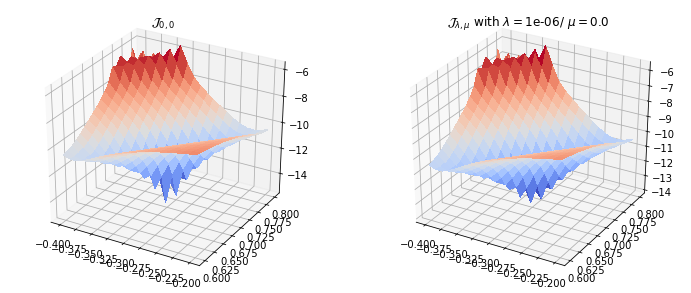

In [7]:
offset = 0.1

domain = [(max(-1,theta_star[0]-offset), max(-1,theta_star[1]-offset)), 
          (min(1, theta_star[0]+offset), min(1, theta_star[1]+offset)) ]
plotJ(domain, (20,20))

And solve the problem using *scipy.optimize*

                theta*    = [-0.3  0.7]
non regularised theta_fit = [-0.50065095  0.4081897 ]
    regularised theta_fit = [-0.50053462  0.40808324]


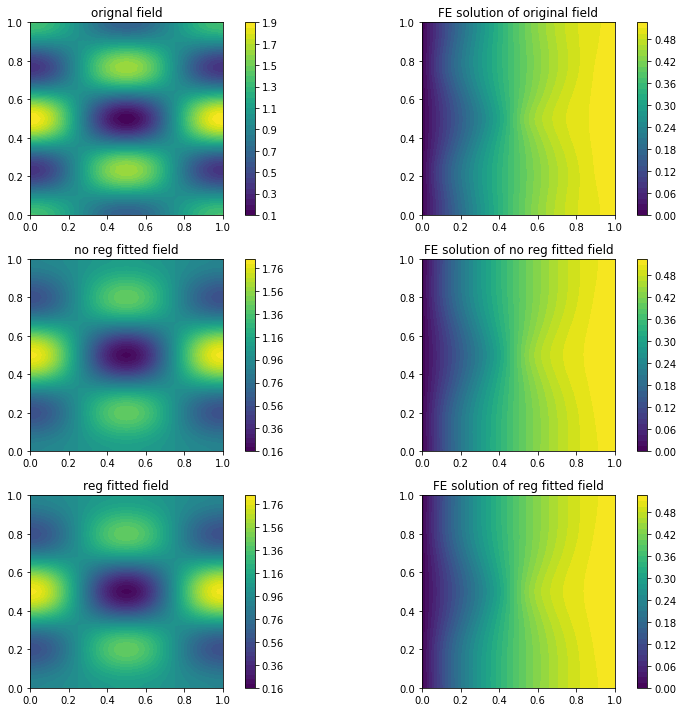

In [8]:
from scipy.optimize import minimize
bounds = [ (-1,1) for _ in range(M)]


#start value for optimisation
theta_0 = [ 0. for _ in range(M)]

fun = lambda theta : J(theta, lam = 0., mu = 0)

res = minimize(fun, theta_0, method='SLSQP', bounds=bounds)
theta_fit_no_reg = res.x

fun = lambda theta : J(theta, lam = lamVal, mu = muVal)
res = minimize(fun, theta_0, method='SLSQP', bounds=bounds)
theta_fit_reg = res.x




print("                theta*    = {v}".format(v=theta_star))
print("non regularised theta_fit = {v}".format(v=theta_fit_no_reg))
print("    regularised theta_fit = {v}".format(v=theta_fit_reg))

V, _,_,_,_ = FEM

no_reg_fitted_field = kappa.realisation(theta_fit_no_reg, V)
reg_fitted_field = kappa.realisation(theta_fit_reg, V)
#originalfield on coarse space V
original_field = kappa.realisation(theta_star, V)

mpl.rcParams['figure.figsize'] = [12, 10]

#plot the original data 
plt.figure()
plt.subplot(3,2,1)
im = plot(original_field, title = 'orignal field')
plt.colorbar(im)

plt.subplot(3,2,2)
im = plot(G(theta_star, FEM), title = 'FE solution of original field')
plt.colorbar(im)

#plot the fitted data for the non regularised version 
plt.subplot(3,2,3)
im = plot(no_reg_fitted_field, title = 'no reg fitted field')
plt.colorbar(im)

plt.subplot(3,2,4)
im = plot(G(theta_fit_no_reg, FEM), title = 'FE solution of no reg fitted field')
plt.colorbar(im)
               

#plot the fitted data for the regularised version               
plt.subplot(3,2,5)
im = plot(reg_fitted_field, title = 'reg fitted field')
plt.colorbar(im)

plt.subplot(3,2,6)
im = plot(G(theta_fit_reg, FEM), title = 'FE solution of reg fitted field')
plt.colorbar(im)
plt.tight_layout()



### Bayesian example

Recall the structure of the posteriori in the case of a Gaussian noise $\eta$ that reads
\begin{equation}
  \pi_\delta = Z^{-1} \exp\left(-\frac{1}{2}\Phi(\theta)\right) \exp\left(-\frac{1}{2}\|\theta\|_2^2\right),
\end{equation}
where
\begin{equation}
\Phi(\theta) = \|\delta - (\mathcal{O}\circ G)(\theta)\|_{2,\Gamma^{-1}}^2
\end{equation}
with the weighted Euclidian norm $\|\cdot\|_{2,\Gamma^{-1}}$ on $\mathbb{R}^d$.
## Exercise 
Visualisize $Z\pi_\delta$, including a countour plot for $M=2$. What can be observed regarding the question of fitting $\theta^*$? 

### remark
Note that in the implementation you rather handle an approximation $G_h$ of $G$ due to the underlying discretisation.

In [9]:
d = len(points)
assert(a !=0)
# implement Phi using p_norm = ||.||_p^2 lambda function
def Phi(theta):
    return p_norm(1/sqrt(a)*np.eye(d).dot(delta - O(G(theta,FEM),points)), 2) 
#implement Z\pi_\delta
def Z_pi_delta(theta):
    return np.exp(-0.5*(Phi(theta) + p_norm(theta,2)))

Now we are ready to plot the scaled density $Z\pi_\delta$.

[-0.3  0.7]


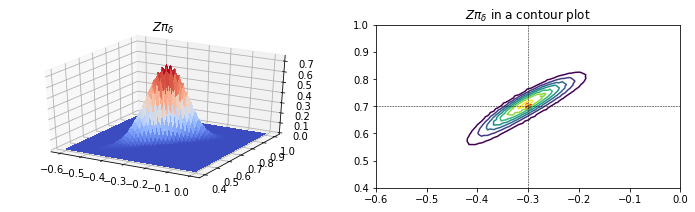

In [10]:
# we only take the domain [-0.6,0]x[0.4,1] since 0 \apprx Zpi_\delta << 1 elsewhere for better visualisation
domain = [(-0.6,0.4), (0.,1.)]
gridsize = (50,50)
# Make grid data.
X = np.linspace(domain[0][0], domain[1][0], gridsize[0])
Y = np.linspace(domain[0][1], domain[1][1], gridsize[1])
X, Y = np.meshgrid(X, Y)

print(theta_star)

# evaluate Zpi_delta at grid points
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = Z_pi_delta(np.array([X[i,j],Y[i,j]]))

mpl.rcParams['figure.figsize'] = [12, 3]
fig = plt.figure()
# Plot the surface.
plt.subplot(1,2,1, projection='3d')
plt.title(r'$Z\pi_\delta$')
ax = plt.gca()
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

plt.subplot(1,2,2)
ax = plt.gca()
plt.title(r'$Z\pi_\delta$'+' in a contour plot')
ax.tricontour(X.flatten(),Y.flatten(), Z.flatten())


plt.axvline(x=theta_star[0], color = 'k', linestyle = '--', linewidth = 0.5)
plt.axhline(y=theta_star[1], color = 'k', linestyle = '--', linewidth = 0.5)
ax.scatter([theta_star[0]],[theta_star[1]], marker = 'X', c='r')


### Markov Chain Monte Carlo

The presented Bayesian approach is intractable for higher dimensions. 
Obviously, one can not generate the value of the Bayesian posterior density in an exponentially growing grid.
Therefore, we want to present one alternative method of computing this density. 

The well known Markov Chain Monte Carlo algorithm aims for the generation of samples w.r.t. a posterior density $\pi_\delta$.
This can be achieved by the creation of an *aperiodic* and *irreducible* transition kernel $P(x, \mathrm d x)$ that satisfies the *detailed balance* condition 
\begin{equation}
  \int_A\int_B \pi_\delta(\mathrm{d}x) P(x, \mathrm dx') = \int_B\int_A \pi_\delta(x') P(x', \mathrm dx)
\end{equation}
which, together with an initial distribution $\pi_0$ forms, a Markov-Chain on the parameter space $X$, having $\pi_\delta$ as stationary distribution.

Therefore, the general Markov Chain Monte Carlo algorithm generates samples according to $\pi_0$ and let them traverse the parameter space according to the transition kernel, until the stationary distribution is reached.
The most popular methods are the *Gibbs* sampler and the *Metropolis-Hastings* algorithm.
We want to focus on a simple version of the latter.

#### Metropolis-Hastings algorithm
In the Hastings method, a proposed new state of the Markov Chain is generated according to the transition kernel, let's say we take a __simple random walk__ transition kernel, i.e. for the next step $x'$, we take the last step and add a gaussian random number on it: $x' = x + \mathcal N(0, I)$.
This step is accepted only with a certain __acceptance probability__ 

\begin{equation}
  \alpha = \min\left\{1, \frac{\pi_\delta(x') P(x, x')}{\pi_\delta(x) P(x', x)}\right\}.
\end{equation}

Since, we can not sample from the posterior density, we have to replace it as in the Bayesian framework with its likelihood representation $\pi_\delta = Z^{-1} \mathcal L \pi_0$ for some prior distribution $\pi_0$ and Likelhood function $\mathcal L$. 
Additionally, we can observe that the random walk transition kernel is symmetric, i.e. $P(x, x') = P(x', x)$.
Then, for every new proposed state we have to compute 

\begin{equation}
  \alpha = \min\left\{1, \frac{\mathcal L(x')\pi_0(x')}{\mathcal L(x)\pi_0(x)}\right\}.
\end{equation}

***

#### Exercise

Implement your own MCMC Hastings algorithm or use the code below, using the package *emcee*. 
Please, install *emcee* in your docker container with the command (may require admin privileges)
\begin{equation}
  \text{pip install emcee}
\end{equation}

Play around with the following parameters:

 - M, number of modes, thus change $\theta^*$ accordingly
 - noP, as the number of measurement/observation nodes in each direction
 - The choice of prior uniform/Gaussian
 - number of MC samples per walker
 - a, noise parameter

In [11]:
import emcee
# Choice of variational problem, either Dirichlet-Neumann(=True) or pure Dirichlet(=False)
mixedBC = True 

# number of observersion points in each direction total of noP^2
noP = 10

# model a value eta through some a, no measurement error with a=0.
a =  0.001

M = 2
mc_samples = 1000
mc_walker = M*2 + 2
burn_in = 50 

initial_state = np.zeros(M)

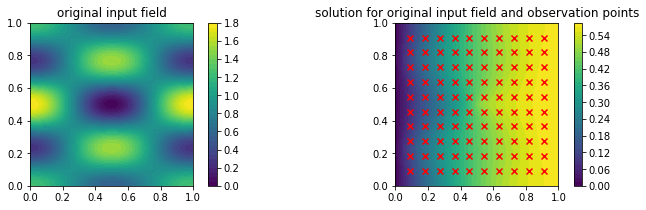

In [12]:
scale = 0.9
mean = (M-1) * scale

kappa = CoefField(mean, M, scale = scale, decay = 0)
FEM_fine = setupFEM(100, 2)

theta_star = np.array([-0.3,0.7]) # may be changed according to M, here M=2 per default
assert len(theta_star) == M
# create observation points for O
points = []
ss  = 1.0/float(noP+1) # step size for equidistant observation points in the interior
for k1 in range(noP):
    for k2 in range(noP):
        points.append([(k1+1)*ss, (k2+1)*ss])


delta = O(G(theta_star, FEM,verbose=True), points,verbose=True) + np.random.randn(len(points))*a

In [13]:
# FEM setup is needed since the previous mesh was to fine
FEM = setupFEM(20, 1)

def ln_Likelihood(theta):
    return -0.5* p_norm(delta - O(G(theta, FEM), points),2)*1/a

def ln_prior(theta):
    # print theta
    if np.any(theta < -1) or np.any(theta>1):
         return -np.inf
    # uninformative prior - up to a constant
    return 0
    # try a gaussian prior
    # return -0.5*p_norm(theta, 2) 

def ln_prob(theta):
    retval = ln_prior(theta) + ln_Likelihood(theta)
    return retval

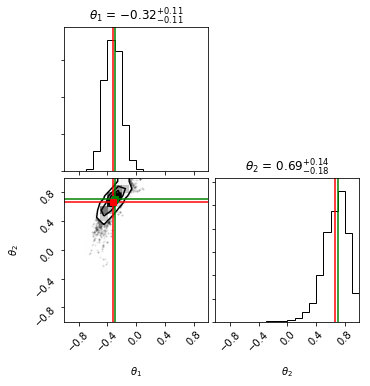

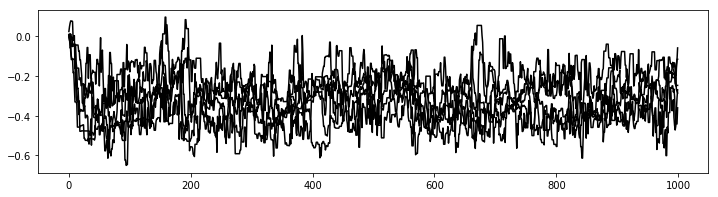

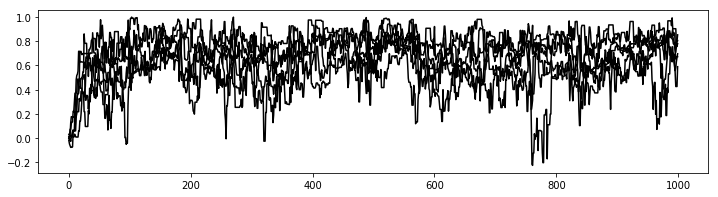

In [14]:
sampler = emcee.EnsembleSampler(mc_walker, M, ln_prob)
pos = np.array([initial_state + np.random.randn(M)*0.01 for i in range(mc_walker)])
sampler.run_mcmc(pos, mc_samples)
mc_states = sampler.chain[:, burn_in:, :].reshape((-1, M))

import corner
# This is the true mean of the second mode that we used above:
value1 = theta_star

# This is the empirical mean of the sample:
value2 = np.mean(mc_states, axis=0)

# Make the base corner plot
figure = corner.corner(mc_states, range=[(-1 ,1) for m in range(M)],
                       labels=[r'$\theta_{m}$'.format(m=m) for m in range(1,M+1)],
                       #quantiles=[0.16, 0.5, 0.84], # only if you like full plots
                       show_titles=True, title_kwargs={"fontsize": 12})
# Extract the axes
axes = np.array(figure.axes).reshape((M, M))

# Loop over the diagonal
for i in range(M):
    ax = axes[i, i]
    ax.axvline(value1[i], color="g")
    ax.axvline(value2[i], color="r")

# Loop over the histograms
for yi in range(M):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="g")
        ax.axvline(value2[xi], color="r")
        ax.axhline(value1[yi], color="g")
        ax.axhline(value2[yi], color="r")
        ax.plot(value1[xi], value1[yi], "sg")
        ax.plot(value2[xi], value2[yi], "sr")
        
for i in range(M):
    plt.figure()
    for m in range(mc_walker):
        plt.plot(range(mc_samples), sampler.chain[m, :, i], 'k')

End of part VII.

<div style="text-align: right; color: #a5a9af"> &copy; Robert Gruhlke, Manuel Marschall 2018-2019</div>